## Loading required libraries and supporting modules

In [ ]:
import pandas as pd
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import spacy
from spacy import displacy

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Loading the file as Dataframe

In [ ]:
apple_twitter_data = pd.read_csv('apple-twitter-sentiment-texts.csv')

In [ ]:
apple_twitter_data

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0
...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,@umo_games @Apple ended up getting a new compu...,0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0


# Text Preprocessing
## Remove punctuations, special characters and stopwords from the text column. 
## Convert the text to lower case. 

In [ ]:
def remove_punc_spec_chars():
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|#[a-zA-Z]+|$[a-zA-Z]+|@[a-zA-Z]+|[,.^_$*%-;鶯!?:]')
    for i in range(len(apple_twitter_data["text"])):
        apple_twitter_data["text"][i] = pattern.sub('', apple_twitter_data["text"][i])

remove_punc_spec_chars()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
apple_twitter_data

,text,sentiment
0,Wow Yall needa step it up RT Music and snapc...,-1
1,What Happened To Apple Inc,0
2,Thank u I can now compile all of the pics tha...,1
3,The oddly uplifting story of the Apple cofound...,0
4,can i exchange my iphone for a different colo...,0
...,...,...
1625,Those PICK UP THE SLACK YOU FUCK BOYS,-1
1626,Finally got my iPhone in the mail and it come...,-1
1627,games ended up getting a new computer anyhow ...,0
1628,The YearOld Who Turned Down Has Nabbed Backi...,0


In [ ]:
# Removing stop words, converting the text to lower case
apple_twitter_data_test = apple_twitter_data.copy()
stop = stopwords.words('english')
apple_twitter_data_test["text"] = apple_twitter_data_test["text"].str.lower().str.split()
apple_twitter_data_test["text"] = apple_twitter_data_test["text"].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
apple_twitter_data_test

,text,sentiment
0,"[wow, yall, needa, step, rt, music, snapchat, ...",-1
1,"[happened, apple, inc]",0
2,"[thank, u, compile, pics, communicate, one, pl...",1
3,"[oddly, uplifting, story, apple, cofounder, so...",0
4,"[exchange, iphone, different, color, lmao, cha...",0
...,...,...
1625,"[pick, slack, fuck, boys]",-1
1626,"[finally, got, iphone, mail, comes, box, buste...",-1
1627,"[games, ended, getting, new, computer, anyhow,...",0
1628,"[yearold, turned, nabbed, backing, star]",0


In [ ]:
# converting the list of words to array of words
def concate_words(data):
    for i in range(len(data)):
        #print(train_data.iloc[i])
        data.iloc[i] = " ".join(data.iloc[i])
    return data

apple_twitter_data_test["text"] = concate_words(apple_twitter_data_test["text"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
apple_twitter_data_test

,text,sentiment
0,wow yall needa step rt music snapchat damn tim...,-1
1,happened apple inc,0
2,thank u compile pics communicate one place,1
3,oddly uplifting story apple cofounder sold sta...,0
4,exchange iphone different color lmao changed mind,0
...,...,...
1625,pick slack fuck boys,-1
1626,finally got iphone mail comes box busted scree...,-1
1627,games ended getting new computer anyhow work c...,0
1628,yearold turned nabbed backing star,0


### Creating two objects X and y. X will be the 'Review' column dataframe and y will be the “Sentiment” column.

In [ ]:
X = apple_twitter_data_test['text']
y = apple_twitter_data_test['sentiment']

In [ ]:
X

0       wow yall needa step rt music snapchat damn tim...
1                                      happened apple inc
2              thank u compile pics communicate one place
3       oddly uplifting story apple cofounder sold sta...
4       exchange iphone different color lmao changed mind
                              ...                        
1625                                 pick slack fuck boys
1626    finally got iphone mail comes box busted scree...
1627    games ended getting new computer anyhow work c...
1628                   yearold turned nabbed backing star
1629    iphone may longer upgrade cycle expect unit sa...
Name: text, Length: 1630, dtype: object

In [ ]:
y

0      -1
1       0
2       1
3       0
4       0
       ..
1625   -1
1626   -1
1627    0
1628    0
1629   -1
Name: sentiment, Length: 1630, dtype: int64

###  Creating 'CountVectorizer' object and split the data into training and testing sets.

In [ ]:
# Creating vectorizer object
vectorizer = CountVectorizer()

In [ ]:
# Splitting train and test data
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.20, random_state=1)

print('Train Set ->', train_data.shape, train_label.shape)
print('Test Set ->', test_data.shape, test_label.shape)

Train Set -> (1304,) (1304,)
Test Set -> (326,) (326,)


### Train a MultinomialNB model

In [ ]:
# Getting the training data vectors
vectors = vectorizer.fit_transform(train_data)

In [ ]:
# Building the Multinomial Naive Bayes classifier with hyperparameter
clf = MultinomialNB(alpha=0.1)

In [ ]:
#  Training the classifier
clf.fit(vectors, train_label)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
# Getting the test data vectors
vectors_test = vectorizer.transform(test_data)

In [ ]:
# Predicting for test data and calculating the scores for the vectors
pred = clf.predict(vectors_test)
acc_score = metrics.accuracy_score(test_label, pred)
f1_score = metrics.f1_score(test_label, pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.7914110429447853
Total F1 classification score: 0.6917823457009525


### Display the confusion Matrix 

In [ ]:
data = confusion_matrix(test_label, pred)

In [ ]:
data

array([[111,   7,   1],
       [ 32, 136,   9],
       [  8,  11,  11]])

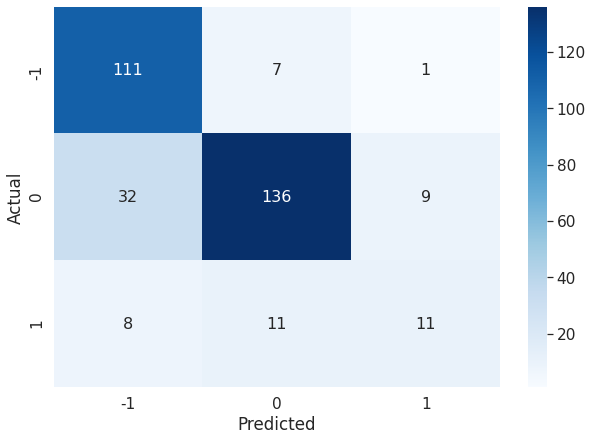

In [ ]:
df_cm = pd.DataFrame(data, columns=np.unique(test_label), index = np.unique(test_label))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')

### Display the POS tagging on the first 4 rows of ‘Review’

In [ ]:
# Display the POS tagging on the first 4 rows of ‘Review’

import nltk
text_docs = ' '.join(apple_twitter_data_test['text'][0:3])

def doc_pos_tag(sent):
  sent = nltk.word_tokenize(sent)
  sent = nltk.pos_tag(sent)
  return sent

sent = doc_pos_tag(text_docs)
print("Words from given documents : ", text_docs)
print("Words <--> POS Tag ", sent)

Words from given documents :  wow yall needa step rt music snapchat damn time thank happened apple inc thank u compile pics communicate one place
Words <--> POS Tag  [('wow', 'NN'), ('yall', 'NN'), ('needa', 'JJ'), ('step', 'NN'), ('rt', 'NN'), ('music', 'NN'), ('snapchat', 'WP'), ('damn', 'VBD'), ('time', 'NN'), ('thank', 'NN'), ('happened', 'VBD'), ('apple', 'NN'), ('inc', 'NN'), ('thank', 'NN'), ('u', 'JJ'), ('compile', 'NN'), ('pics', 'NNS'), ('communicate', 'VBP'), ('one', 'CD'), ('place', 'NN')]


### Build and display a dependency parser tree for the sentence:
“He is one of the five black brothers who sit in judgment of Jon Snow for his actions during his time with the wildlings.”

In [ ]:
# Loading the language model
nlp = spacy.load("en_core_web_sm")

sentence = 'He is one of the five black brothers who sit in judgment of Jon Snow for his actions during his time with the wildlings.'

# nlp function returns an object with individual token information, linguistic features and relationships.
doc = nlp(sentence)
print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

# Displaying the token, dependency nature, head and all dependents of the token
for token in doc:
  print ("{:<15} | {:<8} | {:<15} | {:<20}".format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
# Use displayCy to visualize the dependency 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
He              | nsubj    | is              | []                  
is              | ROOT     | is              | [He, one, .]        
one             | attr     | is              | [of]                
of              | prep     | one             | [brothers]          
the             | det      | brothers        | []                  
five            | nummod   | brothers        | []                  
black           | amod     | brothers        | []                  
brothers        | pobj     | of              | [the, five, black, sit]
who             | nsubj    | sit             | []                  
sit             | relcl    | brothers        | [who, in, for, during]
in              | prep     | sit             | [judgment]          
judgment        | pobj     | in              | [of]                
of              | prep     | judgment   